In [57]:
import re
import pandas as pd
from os import path
from collections import Counter
from glob import glob
from lxml import etree
import multiprocessing
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

In [331]:
def xpath(path_corpus):
    with open(path_corpus, encoding="utf8") as file:
        tree = etree.parse(file)
        if tree.find(".//profileDesc") is not None:
            profil = tree.find(".//profileDesc")
            if profil.get("tag") == "canon":
                tag = True
            else:
                tag = False
        if tree.find(".//term") is not None:
            #findall
            genre = tree.findall(".//term")
        else:
            genre = ""
            
        if genre is None or genre == '':
            return tag, ''
        elif len(genre)>1:
            genre_sans_none = [elem.text for elem in genre if elem.text is not None and elem.text != '']
            return tag, genre_sans_none
        else:
            return tag, [genre[0].text]

In [318]:
genres_pertinents = ['roman historique',
 'policier',
 'littérature jeunesse',
 'mémoires et autobiographie',
 'roman sentimental',
 'fantastique',
 'récit de voyage',
 'épistolaire',
 'science-fiction',
 'non-fiction',
 'érotisme',
 'fragments',
 'journal intime',
 'biographie']

In [375]:
def retrieve_best_genre(list_genre, genres_pertinents):
    for genre in list_genre:
        if genre in genres_pertinents:
            return genre
        elif genre == "roman d'aventures":
            return genre
    return list_genre[0]

In [346]:
path_name = '../corpus_test/*.xml'

In [345]:
def moulinette(path_name, genres_pertinents):
    genre = []
    str_base = " "
    df_corpus = pd.DataFrame([], columns=["date", "auteur", "titre", "canon", "genre"])
    for doc in tqdm(glob(path_name)):
        doc_name = path.splitext(path.basename(doc))[0]
        date = doc_name.split("_")[0]
        auteur = doc_name.split("_")[1]
        titre = doc_name.split("_")[2]
        tag, elements_genre = xpath(doc)
        if elements_genre:
            if len(elements_genre) == 1:
                genre = elements_genre[0]
            elif elements_genre is not None and elements_genre != '':
                genre = retrieve_best_genre(elements_genre, genres_pertinents)
            else:
                genre = ""
        else:
            genre = ''
        df_roman = pd.DataFrame([(date, auteur, titre, tag, genre)], columns=["date", "auteur", "titre", "canon", 'genre'])
        df_corpus = pd.concat([df_corpus, df_roman])
    return df_corpus

In [347]:
df_test = moulinette(path_name, genres_pertinents)

100%|██████████| 9/9 [00:00<00:00, 46.98it/s]


In [348]:
df_test

,date,auteur,titre,canon,genre
0,1877,Goncourt-Edmond-et-Jules-de,La-fille-Elisa,True,
0,1923,Le-Rouge-Gustave,La-Dame-noire-des-frontieres,False,policier
0,1923,Le-Rouge-Gustave,Les-Aventures-de-Todd-Marvel-detective-milliar...,False,policier
0,1923,Leblanc-Maurice,Dorothee-danseuse-de-corde,False,roman d'aventures
0,1923,Proust-Marcel,La-Prisonniere-A-la-recherche-du-temps-perdu,True,cycles et séries
0,1859,Souvestre-Emile,Les-reprouves-et-les-elus-Tome-1,False,
0,1923,Martin-du-Gard-Roger,Les-Thibault-Tome-III-La-Belle-Saison,True,cycles et séries
0,1923,Leblanc-Maurice,Les-Huit-Coups-de-l-horloge,False,policier
0,1923,Istrati-Panait,Les-recits-d-Adrien-Zograffi-I,False,roman d'aventures


In [350]:
path_name = '../corpus_main_xml/*.xml'

In [356]:
df_corpus = moulinette(path_name, genres_pertinents)

100%|██████████| 2964/2964 [00:45<00:00, 65.46it/s]


In [358]:
df_corpus

,date,auteur,titre,canon,genre
0,1880,Ponson-du-Terrail-Pierre-Alexis-de,Les-Aventures-du-capitaine-La-Palisse,False,roman d'aventures
0,1939,Fargue-Leon-Paul,Le-Pieton-De-Paris,True,mémoires et autobiographie
0,1821,Arlincourt-Charles-Victor,Le-Solitaire,False,roman historique
0,1963,San-Antonio,Le-gala-des-emplumes,False,érotisme
0,1996,Daeninckx-Didier,Nazis-dans-le-metro,True,policier
...,...,...,...,...,...
0,1881,Lemonnier-Camille,Les-charniers,False,
0,1860,Privat-d-Anglemont-Alexandre,Paris-anecdote,False,
0,1871,Erckmann-Chatrian,Les-deux-freres,False,
0,1983,Tournier-Michel,Gilles-et-Jeanne,True,roman historique


In [387]:
df_corpus_genred = df_corpus[df_corpus['genre']!='']

[Text(0, 0, "roman d'aventures"),
 Text(1, 0, 'mémoires et autobiographie'),
 Text(2, 0, 'roman historique'),
 Text(3, 0, 'érotisme'),
 Text(4, 0, 'policier'),
 Text(5, 0, ''),
 Text(6, 0, 'non-fiction'),
 Text(7, 0, 'nouvelles'),
 Text(8, 0, 'littérature jeunesse'),
 Text(9, 0, 'fantastique'),
 Text(10, 0, 'roman sentimental'),
 Text(11, 0, 'cycles et séries'),
 Text(12, 0, 'récit de voyage'),
 Text(13, 0, 'épistolaire'),
 Text(14, 0, 'science-fiction'),
 Text(15, 0, 'biographie'),
 Text(16, 0, 'journal intime'),
 Text(17, 0, 'fragments')]

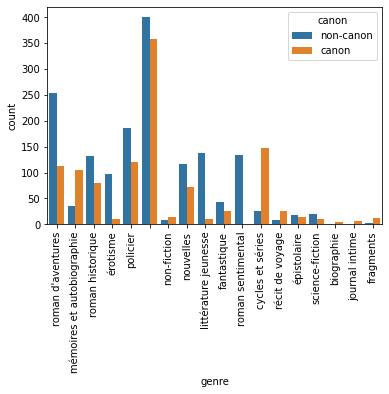

In [391]:
ax = sns.countplot(x="genre", hue="canon",data=df_corpus)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

[Text(0, 0, "roman d'aventures"),
 Text(1, 0, 'mémoires et autobiographie'),
 Text(2, 0, 'roman historique'),
 Text(3, 0, 'érotisme'),
 Text(4, 0, 'policier'),
 Text(5, 0, 'non-fiction'),
 Text(6, 0, 'nouvelles'),
 Text(7, 0, 'littérature jeunesse'),
 Text(8, 0, 'fantastique'),
 Text(9, 0, 'roman sentimental'),
 Text(10, 0, 'cycles et séries'),
 Text(11, 0, 'récit de voyage'),
 Text(12, 0, 'épistolaire'),
 Text(13, 0, 'science-fiction'),
 Text(14, 0, 'biographie'),
 Text(15, 0, 'journal intime'),
 Text(16, 0, 'fragments')]

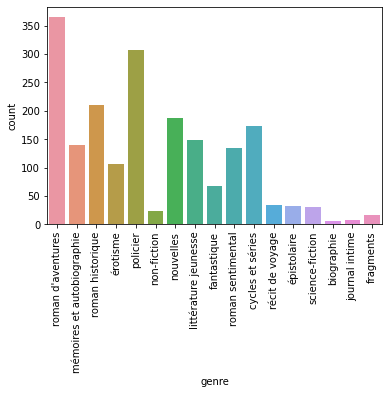

In [389]:
ax = sns.countplot(x="genre",data=df_corpus_genred)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

In [367]:
corpus_genre_sorted = dict(df_corpus.genre.value_counts())

In [368]:
corpus_genre_sorted

{'': 758,
 "roman d'aventures": 365,
 'policier': 307,
 'roman historique': 210,
 'nouvelles': 188,
 'cycles et séries': 174,
 'littérature jeunesse': 148,
 'mémoires et autobiographie': 139,
 'roman sentimental': 134,
 'érotisme': 107,
 'fantastique': 68,
 'récit de voyage': 34,
 'épistolaire': 33,
 'science-fiction': 31,
 'non-fiction': 24,
 'fragments': 16,
 'journal intime': 8,
 'biographie': 5}

In [377]:
758+365+607+210+188+174+148+139+134+107+68

2898

In [354]:
pb = df_corpus[df_corpus['genre']== ' roman historique']

In [355]:
pb

,date,auteur,titre,canon,genre


In [30]:
df_canon = df_corpus[df_corpus['canon']==True]

In [370]:
df_test = moulinette(path_name, genres_pertinents)

100%|██████████| 2964/2964 [00:45<00:00, 65.71it/s]


In [379]:
canonicity = ['canon' if elem else 'non-canon' for elem in df_test['canon']]

In [383]:
df_test['canon']=canonicity

In [386]:
df_corpus['canon']=canonicity

[Text(0, 0, "roman d'aventures"),
 Text(1, 0, 'mémoires et autobiographie'),
 Text(2, 0, 'roman historique'),
 Text(3, 0, 'érotisme'),
 Text(4, 0, 'policier'),
 Text(5, 0, ''),
 Text(6, 0, 'non-fiction'),
 Text(7, 0, 'nouvelles'),
 Text(8, 0, 'littérature jeunesse'),
 Text(9, 0, 'fantastique'),
 Text(10, 0, 'roman sentimental'),
 Text(11, 0, 'cycles et séries'),
 Text(12, 0, 'récit de voyage'),
 Text(13, 0, 'épistolaire'),
 Text(14, 0, 'science-fiction'),
 Text(15, 0, 'biographie'),
 Text(16, 0, 'journal intime'),
 Text(17, 0, 'fragments')]

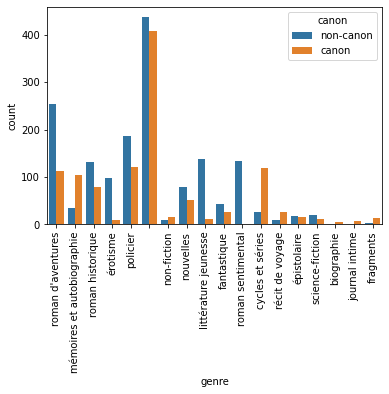

In [384]:
ax = sns.countplot(x="genre", hue="canon",data=df_test)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

[Text(0, 0, "roman d'aventures"),
 Text(1, 0, 'mémoires et autobiographie'),
 Text(2, 0, 'roman historique'),
 Text(3, 0, 'érotisme'),
 Text(4, 0, 'policier'),
 Text(5, 0, ''),
 Text(6, 0, 'non-fiction'),
 Text(7, 0, 'nouvelles'),
 Text(8, 0, 'littérature jeunesse'),
 Text(9, 0, 'fantastique'),
 Text(10, 0, 'roman sentimental'),
 Text(11, 0, 'cycles et séries'),
 Text(12, 0, 'récit de voyage'),
 Text(13, 0, 'épistolaire'),
 Text(14, 0, 'science-fiction'),
 Text(15, 0, 'biographie'),
 Text(16, 0, 'journal intime'),
 Text(17, 0, 'fragments')]

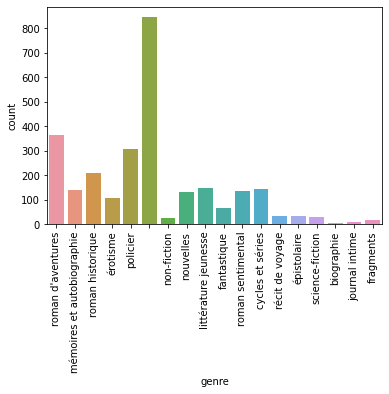

In [385]:
ax = sns.countplot(x="genre",data=df_test)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

In [390]:
df_corpus

,date,auteur,titre,canon,genre
0,1880,Ponson-du-Terrail-Pierre-Alexis-de,Les-Aventures-du-capitaine-La-Palisse,non-canon,roman d'aventures
0,1939,Fargue-Leon-Paul,Le-Pieton-De-Paris,canon,mémoires et autobiographie
0,1821,Arlincourt-Charles-Victor,Le-Solitaire,non-canon,roman historique
0,1963,San-Antonio,Le-gala-des-emplumes,non-canon,érotisme
0,1996,Daeninckx-Didier,Nazis-dans-le-metro,canon,policier
...,...,...,...,...,...
0,1881,Lemonnier-Camille,Les-charniers,non-canon,
0,1860,Privat-d-Anglemont-Alexandre,Paris-anecdote,non-canon,
0,1871,Erckmann-Chatrian,Les-deux-freres,non-canon,
0,1983,Tournier-Michel,Gilles-et-Jeanne,canon,roman historique


In [81]:
def net_auteur(liste_auteur):
    liste_result = []
    for auteur in liste_auteur:
        string_result = " "
        auteur_net = re.sub("-", " ", auteur)
        auteur_net_list = auteur_net.split(" ")
        auteur_new_order_list = auteur_net_list[-(len(auteur_net_list)-1):] + auteur_net_list[:-(len(auteur_net_list)-1)] 
        liste_result.append(string_result.join(auteur_new_order_list).lower()) 
    return liste_result

In [82]:
liste_auteur = net_auteur(list(df_corpus["auteur"]))

In [87]:
liste_auteur

['françois rene de chateaubriand',
 'paul de kock',
 'sophie gay',
 'sophie gay',
 'hadot marie adelaide barthelemy',
 'hadot marie adelaide barthelemy',
 'hadot marie adelaide barthelemy',
 'malarme charlotte de bournon',
 'malarme charlotte de bournon',
 'malarme charlotte de bournon',
 'benjamin constant',
 'hadot marie adelaide barthelemy',
 'hadot marie adelaide barthelemy',
 'hadot marie adelaide barthelemy',
 'hadot marie adelaide barthelemy',
 'hadot marie adelaide barthelemy',
 'hadot marie adelaide barthelemy',
 'charles victor arlincourt',
 'charles victor arlincourt',
 'charles victor arlincourt',
 'victor hugo',
 'claire de durfort duras',
 'd hautpoul anne marie de beaufort',
 'd hautpoul beaufort',
 'du heaume hippolyte mazier',
 'du heaume hippolyte mazier',
 'lamothe langon etienne leon de',
 'claire de duras',
 'j f t. ginouvier',
 'j f t. ginouvier',
 'j f t. ginouvier',
 'paul de kock',
 'inconnu',
 'jules janin',
 'stendhal',
 'eugene françois vidocq',
 'eugene fra

In [90]:
def net_title(liste_titre):
    liste_result = []
    for titre in liste_titre:
        temp = re.sub("-", " ", titre)
        liste_result.append(temp.lower()) 
    return liste_result

In [91]:
liste_titre = net_title(list(df_corpus["titre"]))

In [92]:
liste_titre

['oeuvres completes',
 'l enfant de ma femme',
 'anatole',
 'anatole',
 'la vierge de l indostan ou les portugais au malabar',
 'la vierge de l indostan ou les portugais au malabar',
 'la vierge de l indostan ou les portugais au malabar',
 'lancelot montagu ou le resultat des bonnes fortunes',
 'lancelot montagu ou le resultat des bonnes fortunes',
 'lancelot montagu ou le resultat des bonnes fortunes',
 'adolphe',
 'les venitiens ou le capitaine français',
 'les venitiens ou le capitaine français',
 'les venitiens ou le capitaine français',
 'laurence de sully ou l ermitage en suisse',
 'laurence de sully ou l ermitage en suisse',
 'laurence de sully ou l ermitage en suisse',
 'le solitaire',
 'le renégat',
 'le renégat',
 'han d islande',
 'ourika',
 'le page et la romance',
 'le page et la romance',
 'voyage d un jeune grec a paris',
 'voyage d un jeune grec a paris',
 'le monastere des freres noirs',
 'edouard',
 'gustave et aspais ou les victimes des prejuges de l epoque',
 'gusta

In [93]:
df_corpus["auteur"] = liste_auteur

In [94]:
df_corpus["titre"] = liste_titre

In [104]:
df_corpus

,date,auteur,titre,canon
0,1811,françois rene de chateaubriand,oeuvres completes,True
1,1812,paul de kock,l enfant de ma femme,False
2,1815,sophie gay,anatole,False
3,1815,sophie gay,anatole,False
4,1816,hadot marie adelaide barthelemy,la vierge de l indostan ou les portugais au ma...,False
...,...,...,...,...
2956,2018,pascal quignard,l enfant d ingolstadt,True
2957,2019,christelle dabos,la passe miroir,False
2958,2019,marie aude murail,sauveur fils,False
2959,2020,clementine melois,dehors la tempete,False


In [105]:
df_corpus.rename(columns = {'canon':'fabula'}, inplace = True)

In [107]:
df_corpus['fabula'].value_counts()

False    1807
True     1154
Name: fabula, dtype: int64

In [113]:
df_corpus.to_csv(r'corpus.csv', index = False, header=True)

In [108]:
auteur_prolifique = list(df_corpus["auteur"].value_counts().index.to_list())

In [114]:
nb_roman = list(df_corpus["auteur"].value_counts().to_list())

In [116]:
df_auteur_prolifique = pd.DataFrame(list(zip(auteur_prolifique, nb_roman)), columns = ['auteur', "nb_roman"])

In [119]:
df_auteur_prolifique.to_csv(r'auteurs_prolifiques.csv', index = False, header=True)

In [98]:
df_corpus["auteur"].value_counts(normalize=True)*100

delly                  3.208376
antonio san            3.039514
alexandre dumas        2.971969
honore de balzac       2.870652
georges simenon        2.701790
                         ...   
alfred jarry           0.033772
paule constant         0.033772
charles de ribelle     0.033772
francis wey            0.033772
comtesse de sannois    0.033772
Name: auteur, Length: 714, dtype: float64

In [1]:
import os

In [112]:
os.getcwd()

'C:\\Users\\jeanb\\Documents\\memoire\\dev'

In [122]:
folder_path = r"C:\Users\jeanb\Documents\memoire\dev"

In [153]:
cible_path = r"C:\Users\jeanb\Documents\memoire\dev\corpus_main_txt"

In [154]:
os.chdir(cible_path)

In [145]:
#attention fan'tome' et les nombres -> bug mais 20 occurences => a la main

In [151]:
def rename_romans(corpus_path):
    for name_folder in os.listdir(corpus_path):
        for i in range(0, len(name_folder)-4):
            if name_folder[i] == '-' and name_folder[i+1] == '(' or name_folder[i+1] in ['i','I','1','v', 'V', '2', '3', '4', '5', '6', '7', '8','9'] and name_folder[i+2] in ['i', 'I', '-','v', 'V','o'] and name_folder[i+3] in ['i', 'I', '-','v', 'V','l'] or name_folder[i+1]+name_folder[i+2]+name_folder[i+3]+name_folder[i+4] == 'tome' or name_folder[i+1]+name_folder[i+2]+name_folder[i+3]+name_folder[i+4] == 'Tome' or name_folder[i+1]+name_folder[i+2]+name_folder[i+3]+name_folder[i+4] == 'volu' or name_folder[i+1]+name_folder[i+2]+name_folder[i+3]+name_folder[i+4] == 'Volu':
                name_folder_modif = name_folder[:i]+'_'+name_folder[i+1:]
                print(name_folder, name_folder_modif)
                os.rename(name_folder, name_folder_modif)
                break;

In [155]:
rename_romans(cible_path)

1815_Gay-Sophie_Anatole-Vol-1.txt 1815_Gay-Sophie_Anatole_Vol-1.txt
1815_Gay-Sophie_Anatole-Vol-2.txt 1815_Gay-Sophie_Anatole_Vol-2.txt
1816_Barthelemy-Hadot-Marie-Adelaide_La-Vierge-de-l-Indostan-ou-les-Portugais-au-Malabar-(Tome-1).txt 1816_Barthelemy-Hadot-Marie-Adelaide_La-Vierge-de-l-Indostan-ou-les-Portugais-au-Malabar_(Tome-1).txt
1816_Barthelemy-Hadot-Marie-Adelaide_La-Vierge-de-l-Indostan-ou-les-Portugais-au-Malabar-(Tome-2).txt 1816_Barthelemy-Hadot-Marie-Adelaide_La-Vierge-de-l-Indostan-ou-les-Portugais-au-Malabar_(Tome-2).txt
1816_Barthelemy-Hadot-Marie-Adelaide_La-Vierge-de-l-Indostan-ou-les-Portugais-au-Malabar-(Tome-4).txt 1816_Barthelemy-Hadot-Marie-Adelaide_La-Vierge-de-l-Indostan-ou-les-Portugais-au-Malabar_(Tome-4).txt
1816_Bournon-Malarme-Charlotte-de_Lancelot-Montagu-ou-le-Resultat-des-bonnes-fortunes-Tome-1.txt 1816_Bournon-Malarme-Charlotte-de_Lancelot-Montagu-ou-le-Resultat-des-bonnes-fortunes_Tome-1.txt
1816_Bournon-Malarme-Charlotte-de_Lancelot-Montagu-ou-le-R

1844_Tarbe-Des-Sablons-Michelle-Catherine-Josephine-Guespereau-Mme-Sebastien-Andre_Onesie-ou-les-Soirees-de-l-abbaye-suivie-de-Enguerrand-ou-le-Duel.txt 1844_Tarbe-Des-Sablons-Michelle-Catherine-Josephine-Guespereau-Mme-Sebastien-Andre_Onesie-ou-les-Soirees-de-l-abbaye-s_ivie-de-Enguerrand-ou-le-Duel.txt
1845_Dumas-Alexandre-Pere_Le-batard-de-Mauleon-III.txt 1845_Dumas-Alexandre-Pere_Le-batard-de-Mauleon_III.txt
1845_Feval-Paul-(pere)_Les-Contes-de-nos-peres.txt 1845_Feval-Paul_(pere)_Les-Contes-de-nos-peres.txt
1845_Sue-Eugene_La-coucaratcha-Tome-I.txt 1845_Sue-Eugene_La-coucaratcha_Tome-I.txt
1845_Sue-Eugene_La-coucaratcha-Tome-II.txt 1845_Sue-Eugene_La-coucaratcha_Tome-II.txt
1845_Sue-Eugene_La-coucaratcha-Tome-III.txt 1845_Sue-Eugene_La-coucaratcha_Tome-III.txt
1845_Sue-Eugene_Le-juif-errant-tome-I.txt 1845_Sue-Eugene_Le-juif-errant_tome-I.txt
1845_Sue-Eugene_Le-juif-errant-tome-II.txt 1845_Sue-Eugene_Le-juif-errant_tome-II.txt
1845_Sue-Eugene_Paula-Monti-ou-L-Hotel-Lambert-Tome-I.

1870_Houssaye-Arsene_Les-Courtisanes-du-monde-Tome-2.txt 1870_Houssaye-Arsene_Les-Courtisanes-du-monde_Tome-2.txt
1870_Houssaye-Arsene_Les-Courtisanes-du-monde-Tome-3.txt 1870_Houssaye-Arsene_Les-Courtisanes-du-monde_Tome-3.txt
1870_Marmette-Joseph_Francois-De-Bienville--Scenes-de-la-Vie-Canadienne-au-XVII-siecle.txt 1870_Marmette-Joseph_Francois-De-Bie_ville--Scenes-de-la-Vie-Canadienne-au-XVII-siecle.txt
1870_Ponson-du-Terrail-Pierre_Rocambole-La-Corde-du-pendu-Tome-I--La-Corde-du-pendu.txt 1870_Ponson-du-Terrail-Pierre_Rocambole-La-Corde-du-pendu_Tome-I--La-Corde-du-pendu.txt
1870_Ponson-du-Terrail-Pierre_Rocambole-La-Corde-du-pendu-Tome-II--L-Homme-gris.txt 1870_Ponson-du-Terrail-Pierre_Rocambole-La-Corde-du-pendu_Tome-II--L-Homme-gris.txt
1871_Gaboriau-Emile_La-Degringolade-Tome-1.txt 1871_Gaboriau-Emile_La-Degringolade_Tome-1.txt
1871_Verne-Jules_Une-Ville-flottante.txt 1871_Verne-Jules_Une_Ville-flottante.txt
1872_Dumas-Alexandre_Robin-Hood-le-prince-des-voleurs-I.txt 1872_Dumas

1886_Villiers-de-l'Isle-Adam_L'Eve-future.txt 1886_Villiers-de-l'Isle-Adam_L'Eve-future.txt
1886_Villiers-de-l-Isle-Adam_L-Eve-future.txt 1886_Villiers-de-l-Isle-Adam_L-Eve-future.txt
1887_Greville-Henry_Nikanor.txt 1887_Gr_ville-Henry_Nikanor.txt
1887_Guy-de-Maupassant_Mont-Oriol.txt 1887_Guy-de-Maupassant_Mont-O_iol.txt
1887_Villiers-de-l'Isle-Adam_Tribulat-Bonhomet.txt 1887_Villiers-de-l'Isle-Adam_Tribulat-Bonhomet.txt
1887_Villiers-de-l-Isle-Adam-Auguste_Tribulat-Bonhomet.txt 1887_Villiers-de-l-Isle-Adam-Auguste_Tribulat-Bonhomet.txt
1888_Boisgobey-Fortune-du_L-Oeil-de-chat-Tome1.txt 1888_Boisgobey-Fortune-du_L-Oeil-de-chat_Tome1.txt
1888_Boisgobey-Fortune-du_L-Oeil-de-chat-Tome2.txt 1888_Boisgobey-Fortune-du_L-Oeil-de-chat_Tome2.txt
1888_Greville-Henry_La-seconde-mere.txt 1888_Gr_ville-Henry_La-seconde-mere.txt
1888_Stolz-Madame-de_Violence-et-bonte.txt 1888_Stolz-Madame-de__iolence-et-bonte.txt
1889_Graffigny-H-de-Le-Faure-Georges_Aventures-extraordinaires-d-un-savant-russe-Tome-

1921_Pagnol-Marcel_La-Petite-Fille-aux-yeux-sombres-suivi-de-Les-secrets-de-Dieu.txt 1921_Pagnol-Marcel_La-Petite-Fille-aux-yeux-sombres-s_ivi-de-Les-secrets-de-Dieu.txt
1922_Bordeaux-Henry_Le-fantome-de-la-rue-Michel-Ange.txt 1922_Bordeaux-Henry_Le-fa_tome-de-la-rue-Michel-Ange.txt
1922_Galopin-Arnould_Memoires-d-un-cambrioleur-retire-des-affaires.txt 1922_Galopin-Arnould_Memoires-d-un-camb_ioleur-retire-des-affaires.txt
1922_Leroux-Gaston_Le-coeur-cambriole.txt 1922_Leroux-Gaston_Le-coeur-camb_iole.txt
1922_Margueritte-Victor_Poum-(aventures-d-un-petit-garçon).txt 1922_Margueritte-Victor_Poum_(aventures-d-un-petit-garçon).txt
1922_Martin-du-Gard-Roger_Les-Thibault-Tome-I-Le-Cahier-gris.txt 1922_Martin-du-Gard-Roger_Les-Thibault_Tome-I-Le-Cahier-gris.txt
1922_Martin-du-Gard-Roger_Les-Thibault-Tome-II-Le-penitencier.txt 1922_Martin-du-Gard-Roger_Les-Thibault_Tome-II-Le-penitencier.txt
1922_Rolland-Romain_L-ame-enchantee-Annette-et-Sylvie-Volume-1.txt 1922_Rolland-Romain_L-ame-enchantee

2007_Volodine-Antoine_Songes-de-Mevlido.txt 2007_Volodine-Antoine_Songes-de-Mevlido.txt
2008_Le-Clezio-Jean-Marie-Gustave_Ritournelle-de-la-faim.txt 2008_Le-Cle_io-Jean-Marie-Gustave_Ritournelle-de-la-faim.txt
2008_Nunez-Laurent_Les-recidivistes.txt 2008_Nunez-Laurent_Les-reci_ivistes.txt
2008_Rolin-Olivier_La-Chambre-des-cartes.txt 2008_Rolin-O_ivier_La-Chambre-des-cartes.txt
2008_Rolin-Olivier_Un-chasseur-de-lions.txt 2008_Rolin-O_ivier_Un-chasseur-de-lions.txt
2010_Volodine-Andoine-(pseudonyme--Lutz-Bassmann)_Les-aigles-puent.txt 2010_Volodine-Andoine-(pseudonyme--Lutz-Bassmann)_Les-aigles-puent.txt
2010_Volodine-Antoine_Ecrivains.txt 2010_Volodine-Antoine_Ecrivains.txt
2011_Abecassis-Eliette_Et-te-voici-permise-a-tout-homme.txt 2011_Abecassis-Eliette_Et-te_voici-permise-a-tout-homme.txt
2011_Gaude-Laurent_Les-Oliviers-du-Negus.txt 2011_Gaude-Laurent_Les-O_iviers-du-Negus.txt
2012_Adam-Olivier_Les-Lisieres.txt 2012_Adam-O_ivier_Les-Lisieres.txt
2012_Damasio-Alain_Aucun-souvenir-asse

In [111]:
os.chdir(folder_path)